# California Housing Price Prediction

In [3]:
import pandas as pd

## Load the data :

* Read the “housing.csv” file from the folder into the program.
* Print first few rows of this data.
* Extract input (X) and output (Y) data from the dataset.

In [4]:
caHousingDf = pd.read_excel('1553768847_housing.xlsx')

In [5]:
caHousingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
x=caHousingDf.iloc[:,:-1]

In [7]:
y=caHousingDf.median_house_value

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


## Handle missing values :

* Fill the missing values with the mean of the respective column.

In [9]:
caHousingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
caHousingDf.shape

(20640, 10)

**From the above info, it is evident that total_bedrooms have null values**

In [11]:
x[caHousingDf.total_bedrooms.isna()==True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN


In [12]:
x.total_bedrooms.mean()

537.8705525375618

In [13]:
x.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

**Replacing null values in total_bedrooms column with mean of the same column**

In [14]:
x.total_bedrooms.fillna(x.total_bedrooms.mean(),inplace=True)

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


## Encode categorical data :

* Convert categorical column in the dataset to numerical data.

In [16]:
x.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
x.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
def transform_ocean_proximity(text):
    op = {'<1H OCEAN':1,
         'INLAND':2,
         'NEAR OCEAN':3,
         'NEAR BAY':4,
         'ISLAND':5,
         'OTHERS':6}
    return op[text]

In [19]:
transform_ocean_proximity('INLAND')

2

In [20]:
x['ocean_proximity_new']=x['ocean_proximity'].apply(lambda x:transform_ocean_proximity(x))

In [21]:
x.ocean_proximity_new.value_counts()

1    9136
2    6551
3    2658
4    2290
5       5
Name: ocean_proximity_new, dtype: int64

In [22]:
x.drop(columns=['ocean_proximity'],inplace=True)

In [23]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_new
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,4
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,4
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,4
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,2
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,2
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,2
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,2


In [24]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [25]:
caHousingDf['ocean_proximity_new']=x['ocean_proximity_new']

In [26]:
import seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1008x720 with 0 Axes>

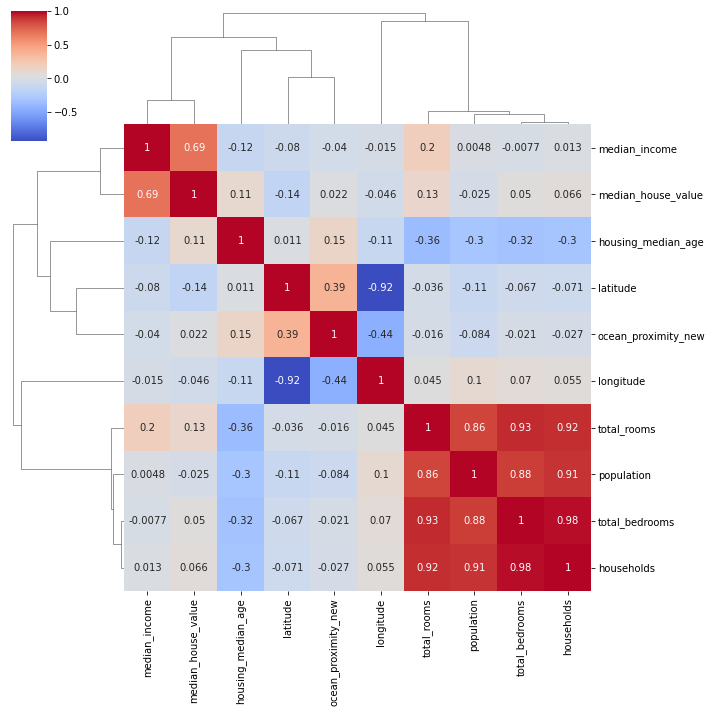

In [27]:
plt.figure(figsize=(14,10))
sns.clustermap(caHousingDf.corr(),annot=True,cmap='coolwarm')

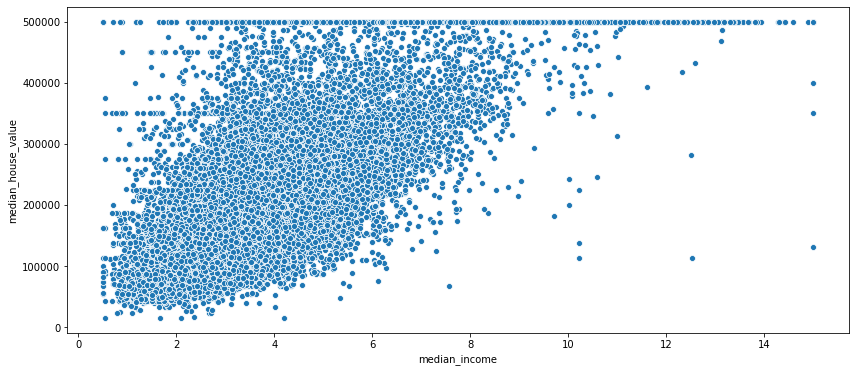

In [28]:
plt.figure(figsize=(14,6))
sns.scatterplot(caHousingDf.median_income,caHousingDf.median_house_value)

In [29]:
caHousingDf[(caHousingDf.median_income>0) & (caHousingDf.median_income<2) & (caHousingDf.median_house_value>450000)][['median_income','median_house_value']]

,median_income,median_house_value
89,1.2434,500001
459,1.1696,500001
1914,1.8750,500001
4259,1.8209,500001
4642,1.8214,475000
4861,0.4999,500001
6639,1.1667,500001
6651,1.9923,500001
6688,0.4999,500001
8923,1.9722,500001


In [30]:
caHousingDf.shape

(20640, 11)

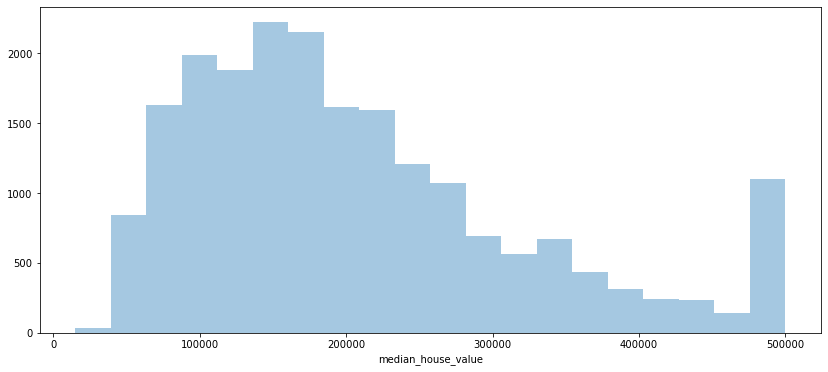

In [31]:
plt.figure(figsize=(14,6))
sns.distplot(caHousingDf.median_house_value,bins=20,kde=False)

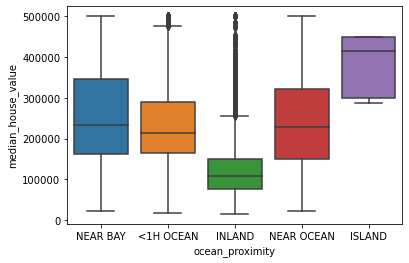

In [32]:
sns.boxplot(x=caHousingDf.ocean_proximity,y=caHousingDf.median_house_value)

## Split the dataset : 

* Split the data into 80% training dataset and 20% test dataset.

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [34]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_new
12069,-117.55,33.83,6,502,76.000000,228,65,4.2386,2
15925,-122.44,37.73,52,2381,492.000000,1485,447,4.3898,4
11162,-118.00,33.83,26,1718,385.000000,1022,368,3.9333,1
4904,-118.26,34.01,38,697,208.000000,749,206,1.4653,1
4683,-118.36,34.08,52,2373,601.000000,1135,576,3.1765,1
...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20,1314,229.000000,712,219,4.4125,2
19648,-120.89,37.48,27,1118,195.000000,647,209,2.9135,2
9845,-121.90,36.58,31,1431,537.870553,704,393,3.1977,3
10799,-117.93,33.62,34,2125,498.000000,1052,468,5.6315,1


## Standardize data :

* Standardize training and test datasets.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
st=StandardScaler()

In [37]:
st.fit(x_train)

StandardScaler()

In [38]:
x_train_std=pd.DataFrame(st.transform(x_train))

In [39]:
x_test_std=pd.DataFrame(st.transform(x_test))

In [40]:
x_train_std

,0,1,2,3,4,5,6,7,8
0,1.003899,-0.840062,-1.795076,-0.977736,-1.098370,-1.047601,-1.135650,0.190012,0.091027
1,-1.434772,0.985364,1.855539,-0.118501,-0.108593,0.052109,-0.136882,0.269311,2.083135
2,0.779481,-0.840062,-0.207852,-0.421680,-0.363175,-0.352955,-0.343433,0.029895,-0.905026
3,0.649818,-0.755812,0.744482,-0.888566,-0.784306,-0.591794,-0.766994,-1.264470,-0.905026
4,0.599947,-0.723048,1.855539,-0.122159,0.150747,-0.254095,0.200399,-0.367016,-0.905026
...,...,...,...,...,...,...,...,...,...
16507,-0.846300,1.238115,-0.684019,-0.606422,-0.734341,-0.624165,-0.733005,0.281216,0.091027
16508,-0.661778,0.868349,-0.128491,-0.696050,-0.815236,-0.681031,-0.759151,-0.504949,0.091027
16509,-1.165471,0.447097,0.188954,-0.552920,0.000545,-0.631164,-0.278069,-0.355897,1.087081
16510,0.814390,-0.938355,0.427037,-0.235565,-0.094317,-0.326709,-0.081976,0.920532,-0.905026


## Perform Linear Regression : 

* Perform Linear Regression on training data.
* Predict output for test dataset using the fitted model.
* Print root mean squared error (RMSE) from Linear Regression.

In [41]:
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression()

In [42]:
lmodel.fit(x_train_std,y_train)

LinearRegression()

In [43]:
lmodel.score(x_train_std,y_train)

0.6380042433770577

In [44]:
lmodel.score(x_test_std,y_test)

0.6262730850217939

In [45]:
est_y_test=lmodel.predict(x_test_std)

In [46]:
est_y_train=lmodel.predict(x_train_std)

In [47]:
from sklearn.metrics import mean_squared_error 

In [48]:
mean_squared_error(y_test,est_y_test,squared=False)

69808.52690845223

In [49]:
mean_squared_error(y_train,est_y_train,squared=False)

69604.94263556376

In [50]:
y_test.shape

(4128,)

In [51]:
est_y_test.shape

(4128,)

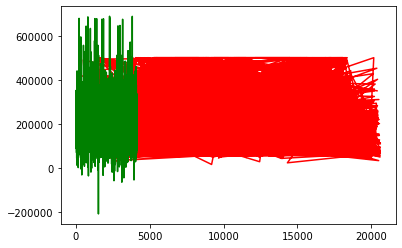

In [52]:
plt.plot(y_test,color='red')
plt.plot(est_y_test,color='green')

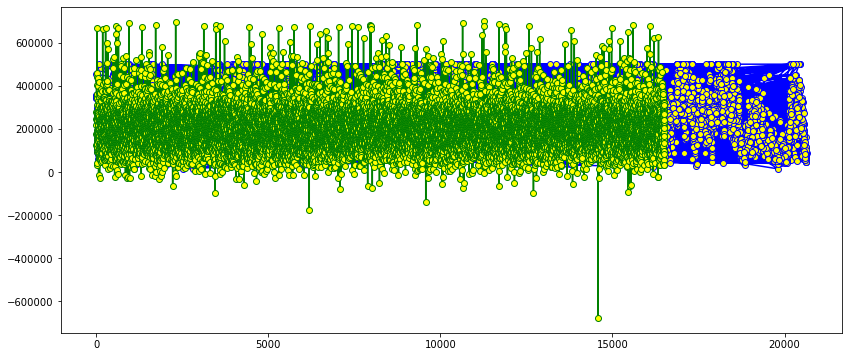

In [53]:
plt.figure(figsize=(14,6))
plt.plot(y_train,color='blue',marker='o',markerfacecolor='yellow')
plt.plot(est_y_train,color='green',marker='o',markerfacecolor='yellow')

## Bonus exercise: Perform Linear Regression with one independent variable :

* Extract just the median_income column from the independent variables (from X_train and X_test).
* Perform Linear Regression to predict housing values based on median_income.
* Predict output for test dataset using the fitted model.
* Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [54]:
x1=pd.DataFrame(caHousingDf.median_income)
y1=caHousingDf.median_house_value

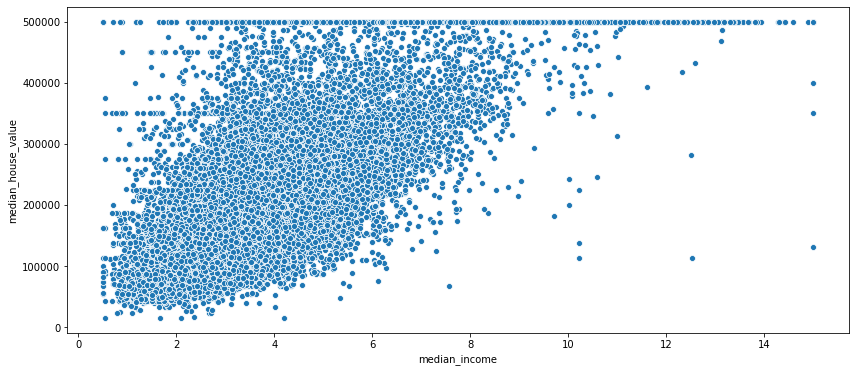

In [55]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=caHousingDf.median_income,y=caHousingDf.median_house_value)

* **Training the model with full data(median_income)**
* **finding the score**
* **predicting median_house_value with fitted model**
* **Plot the fitted model vs the original values provided in the dataset**

In [56]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x1,y1)

LinearRegression()

In [57]:
lreg.score(x1,y1)

0.47344749180719903

In [58]:
est_median_house_value=lreg.predict(x1)

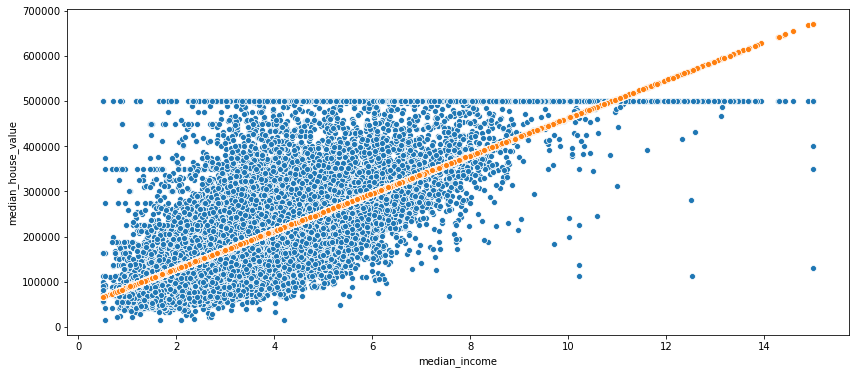

In [59]:
plt.figure(figsize=(14,6))
sns.scatterplot(caHousingDf.median_income,caHousingDf.median_house_value)
sns.scatterplot(caHousingDf.median_income,est_median_house_value)

* **Training the model with default split of train and test**
* **finding the score for train and test data**
* **predicting median_house_value with fitted model**
* **Plot the fitted model vs the original values provided in the dataset**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0)

In [63]:
x1_train

,median_income
19226,7.3003
14549,5.9547
9093,3.2125
12213,6.9930
12765,2.5162
...,...
13123,4.4125
19648,2.9135
9845,3.1977
10799,5.6315


In [64]:
x1

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [52]:
y1_test

14740    136900
10101    241300
20566    200700
2670      72500
15709    460000
          ...  
13132    121200
8228     137500
3948     160900
8522     227300
16798    265600
Name: median_house_value, Length: 5160, dtype: int64

In [53]:
lreg.fit(x1_train,y1_train)

LinearRegression()

In [54]:
lreg.score(x1_train,y1_train)

0.48061930819884535

In [55]:
lreg.score(x1_test,y1_test)

0.4512591462254417

In [56]:
est_y1_test = lreg.predict(x1_test)

In [57]:
est_y1_test

array([219153.71266789, 287966.44584942, 227477.3563363 , ...,
       197078.51346197, 276709.02427045, 245029.29565131])

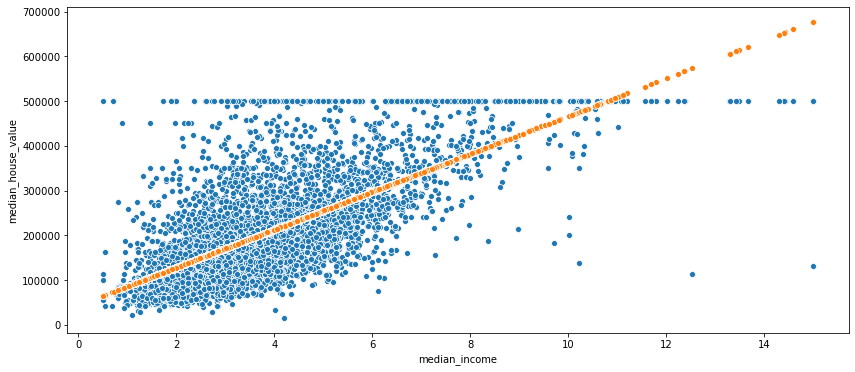

In [58]:
plt.figure(figsize=(14,6))
sns.scatterplot(x1_test.median_income,y1_test)
sns.scatterplot(x1_test.median_income,est_y1_test)

In [79]:
mean_squared_error(y1_test,est_y1_test,squared=False)

85167.68498179798